# NBA Shooting Data
### Jason Pollock

## Introduction
Who are the best shooters in the NBA? This tutorial is going to examine NBA shooting data from the 2014-2015 season and try to answer this question using data science techniques. In addition, this tutorial will show you how you can use advanced plotting techniques to visualize the data.

I will be using two datasets for this tutorial. The reason I used two is because the first one allowed me to talk about data tidying while the second dataset contained shot location data which allowed me to do some more advanced visualization.

## Outline
<ol>
    <li>Gather data</li>
    <li>Tidy the data</li>
    <li>Exploratory Data Analysis</li>
    <li>Hypothesis Testing</li>
</ol>

## Required Tools
You will need Python 3.5 and the following libraries:
<ul>
<li>pandas</li>
<li>seaborn (for visualization)</li>
</ul>

<p>The last thing you need is the dataset which can be found at https://www.kaggle.com/dansbecker/nba-shot-logs/data</p>

## Motivation
Using data science and analytic techniques to come up with a new way to look at NBA shooting data.

<a id='section1'></a>
## 1. Gathering the data
The first thing you are going to need to do is download the dataset from https://www.kaggle.com/dansbecker/nba-shot-logs/data. This dataset is a CSV (comma seperated values) file and can be read using the pandas library. When pandas reads the CSV file, it will create a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). This is basically just a table of the data.

If you would like to learn more about pandas, [click here](http://pandas.pydata.org/pandas-docs/stable/).

In [1]:
#look at clutch players
#do players shoot better in certain quarters
#predicting salaries based on shooting
#Data on shots taken during the 2014-2015 season,

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import warnings
from scipy import stats
%matplotlib inline
#warnings.filterwarnings('ignore')

In [96]:
#load data into dataframe
shots_df = pd.read_csv("shot_logs2.csv")
#print out first 5 rows of the data
shots_df.head()

len(shots_df)
shots_df.sort('')

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


Just some general stats about the NBA and the dataset<br>
169,634 total shots logged from the 2014-2015 regular season<br>
82 games each team plays<br>
2,068 shots per game<br>
30 teams in the NBA<br>


### 1.1 Quick look at the data
Now we have a pandas data frame called shots_df. Here we can see some of the basic features of our data, such as shot number, game clock, shot distance, and whether or not the player made the shot. There are many other features and we will discuss in the next section what we are going to do with them. Missing data is indicated as NaN.

## 2. Tidying our data
In tidy data:
<ul>
<li>Each variable forms a column.</li>
<li>Each observation forms a row</li>
<li>Each type of observational unit forms a table.</li>
</ul>

<p>If you would like to learn more about tidy data, please [click here](https://www.jstatsoft.org/article/view/v059i10/v59i10.pdf) (Note: this is a link to a pdf download)</p>

This data is pretty tidy already. Each variable is in fact a column and each observation is a row. To clean it up a little more, we are going to drop some columns that we don't need. This is just going to help us when we are looking at the the whole dataframe. 

In [102]:
#tidying data
#add shot type for later
#get rid of missing data nan
#fix shot_clock nan with game clock

#this will remove, or drop, a column in our dataframe
shots_df = shots_df.drop('MATCHUP', axis=1)
shots_df = shots_df.drop('GAME_ID', axis=1)
shots_df = shots_df.drop('FINAL_MARGIN', axis=1)
shots_df = shots_df.drop('W', axis=1)
shots_df = shots_df.drop('LOCATION', axis=1)
shots_df.head()

,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [103]:
cols = shots_df.columns.tolist()
cols = cols[-2:] + cols[:-2]
shots_df = shots_df[cols]
shots_df.head()

,player_name,player_id,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS
0,brian roberts,203148,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2
1,brian roberts,203148,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0
2,brian roberts,203148,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0
3,brian roberts,203148,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0
4,brian roberts,203148,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0


The next thing we want to do is replace the missing values indicated by NaN. We want to do this so we can use those rows for data analysis later on in the tutorial. We can see in the third row there is a NaN value in the SHOT_CLOCK column. Since the game clock was under 24 seconds when the team took control of the ball, the shot clock was turned off and therefore was reported as NaN. If you are unfamiliar with the shot clock rules in the NBA, you can read more about them [here](http://www.nba.com/analysis/rules_7.html?nav=ArticleList).

We will replace the missing shot clock data with the game clock time.

In [104]:
for row, shots in shots_df.iterrows():
    if math.isnan(shots['SHOT_CLOCK']):
        #set shot clock to the game clock seconds time
        shots_df.set_value(row, 'SHOT_CLOCK', shots['GAME_CLOCK'].split(':')[1])
shots_df.head()

,player_name,player_id,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS
0,brian roberts,203148,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2
1,brian roberts,203148,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0
2,brian roberts,203148,3,1,0:00,0.0,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0
3,brian roberts,203148,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0
4,brian roberts,203148,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0


We can see that the third value in the shot clock column was replaced with 0.0.

The next bit of tidying we want to do is changing the data type of the game clock so we can use this later on in the machine learning section. Currently, the game clock column is a string type. We want it as a number so we will convert it to seconds. Again, we will see later on why this is necessary.

In [105]:
#to convert to seconds, we just split the string on the semi colon and do some basic math
shots_df['seconds'] = shots_df['GAME_CLOCK'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
shots_df['seconds'].head()

0     69
1     14
2      0
3    707
4    634
Name: seconds, dtype: int64

This last part of tidying is just adding another column so we can visualize the data later on. I will be creating a column to identify the type of shot that was taken.

In [106]:
shots_df.loc[(shots_df['PTS_TYPE']  == 3), 'SHOT_TYPE'] = 'Three'
shots_df.loc[(shots_df['SHOT_DIST'] >= 8) & (shots_df['SHOT_DIST']  <= 18) , 'SHOT_TYPE'] = 'Mid Range'
shots_df.loc[(shots_df['SHOT_DIST']  < 8), 'SHOT_TYPE'] = 'In the Paint Area'
shots_df.loc[(shots_df['SHOT_DIST'] > 18) & (shots_df['PTS_TYPE'] == 2) , 'SHOT_TYPE'] = 'Long Two'
shots_df.loc[(shots_df['SHOT_DIST']  < 2), 'SHOT_TYPE'] = 'Layup/Dunk'

## 3. Exploratory Data Analysis
Now that our data is nice and tidy, we can start performing analysis on it. The purpose of this analysis will be to get more information about general trends and patterns in our data so that we can make testable hypotheses. We will perform two kinds of analysis: visualization and statistical measures.

### 3.1 Basic NBA Statistics
Let's first look at some basic statics regarding the players with the highest field goal percentage. This will help us become more comfortable using dataframes and using [_groupby()_](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html). We can groupby player name to get each players total made and missed field goals and then easily calculate their field goal percentage. By using the _size()_ method, we get the counts for each players made and missed since we are grouping by both player_name and SHOT_RESULT. We are only going to look at players who have taken at least 100 shots to ensure the players have a large enough sample size.

In [428]:
#groupby players and get the counts of made and missed field goals
shooters = shots_df.groupby(['player_name', 'SHOT_RESULT']).size().unstack(fill_value=0)
shooters['total'] = shooters['made'] + shooters['missed']
shooters['fg%'] = shooters['made'] / shooters['total']
shooters[shooters['total'] >= 100].sort('fg%', ascending=0).head()

SHOT_RESULT,made,missed,total,fg%
player_name,,,,
deandre jordan,280,113,393,0.712468
tyson chandler,230,110,340,0.676471
rudy gobert,167,100,267,0.625468
james johnson,191,120,311,0.614148
ed davis,211,139,350,0.602857


We can see that these are the top 5 players during the 2014-2015 NBA season who had the highest overall feild goal perecentage. For those of you who are not basketball fans or may not know much about these players, all these players are either Centers or Power Fowards. Their main objective on offense is to remain close to the basket. More information about players and positions can be found [here](http://www.nba.com/canada/Basketball_U_Players_and_Posi-Canada_Generic_Article-18037.html). It makes sense that these sort of players have the highest overall field goal percentage because they spend the majority of their time on offense near basket and take most of their shots very close to the basket. Next we can look at who are the best three point shooters in the NBA.

In [108]:
three_df = shots_df[shots_df['PTS_TYPE'] == 3]
three_df = three_df.groupby(['player_name', 'SHOT_RESULT']).size().unstack(fill_value=0)
three_df['total'] = three_df['made'] + three_df['missed']
three_df['fg%'] = three_df['made'] / three_df['total']
three_df = three_df[three_df['total'] > 100]
three_df.sort('fg%', ascending=0).head()

SHOT_RESULT,made,missed,total,fg%
player_name,,,,
luke babbitt,52,51,103,0.504854
kyle korver,176,179,355,0.495775
courtney lee,75,96,171,0.438596
klay thompson,177,230,407,0.434889
harrison barnes,67,88,155,0.432258


### 3.2 Finding trends in the data

Now we are going to see if we can find any interesting trends in our data by doing data visualization and stastical analysis. This is the section of the tutorial where we are going to change datasets.  Please reference the data set down below. If you would like to learn more about how I created the set, please see the [Appendix](#Appendix).

In [454]:
shots_df = pd.read_csv("shots.csv")
shots_df.head()

,Unnamed: 0,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,0,Shot Chart Detail,21400230,4,2561,David West,1610612754,Indiana Pacers,1,11,...,Center(C),Less Than 8 ft.,1,-5,9,1,1,20141128,IND,ORL
1,1,Shot Chart Detail,21400230,7,2561,David West,1610612754,Indiana Pacers,1,11,...,Center(C),16-24 ft.,21,-8,211,1,0,20141128,IND,ORL
2,2,Shot Chart Detail,21400230,22,2561,David West,1610612754,Indiana Pacers,1,10,...,Center(C),Less Than 8 ft.,2,-21,11,1,1,20141128,IND,ORL
3,3,Shot Chart Detail,21400230,159,2561,David West,1610612754,Indiana Pacers,2,10,...,Center(C),Less Than 8 ft.,2,-13,17,1,1,20141128,IND,ORL
4,4,Shot Chart Detail,21400230,165,2561,David West,1610612754,Indiana Pacers,2,9,...,Center(C),8-16 ft.,10,42,94,1,0,20141128,IND,ORL


Let's quickly plot the type of shot players take to see what the most commmon shots are. For those of you who are unfamiliar with basketball, the picture below will help you visualize the court. Also, the backcourt is not pictured here but it is just the other half of the court.

<img align='left' width=300 src="nba_court.png">

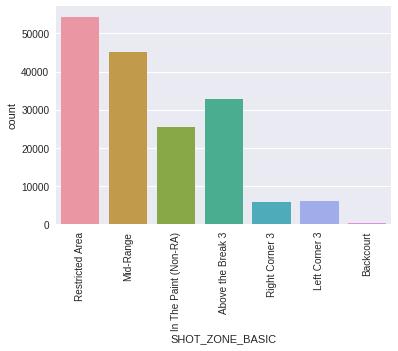

In [458]:
plot = sns.countplot(shots_df['SHOT_ZONE_BASIC'])
plt.xticks(rotation=90)
plt.show()

This graph shows us that players take the majority of their shots within the restricted area. This makes sense since this is the closest area to the basket.

Now we can look at the percentages of each of these shots to see if the players shot selections make sense.

In [465]:
shot_type_df = shots_df.groupby(['SHOT_ZONE_BASIC', 'SHOT_MADE_FLAG']).size().unstack(fill_value=0)
shot_type_df['total'] = shot_type_df[1] + shot_type_df[0]
shot_type_df['fg%'] = shot_type_df[1] / shot_type_df['total']
shot_type_df.sort('fg%',ascending=0)

SHOT_MADE_FLAG,0,1,total,fg%
SHOT_ZONE_BASIC,,,,
Restricted Area,21503,32906,54409,0.604790
Right Corner 3,3387,2269,5656,0.401167
Mid-Range,27156,18093,45249,0.399854
In The Paint (Non-RA),15231,10082,25313,0.398293
Left Corner 3,3680,2299,5979,0.384512
Above the Break 3,21444,11248,32692,0.344060
Backcourt,327,9,336,0.026786


For the most part these percentages make sense, right? The closer you are to the basket, the easier it is to make the shot. It seems that the corner three's are very close to the perecentage of Mid-Range and In the Paint shots. This is an interesting piece of information that we can explore further.

Next, we can take a look at the average points a player is going to score based on the shot he takes. This just means we are going multiply field goal percentage by 2 (or 3 for a three point shot) and this will give us the expected number of points per shot. We can use this number to see how effective players are shooting.

In [477]:
total = shot_type_df.total.sum()
shot_type_df['% taken'] = shot_type_df.total/total
shot_type_df['PPS'] = shot_type_df['fg%'] * 2
shot_type_df.loc['Right Corner 3', 'PPS'] = shot_type_df.loc['Right Corner 3']['fg%'] * 3
shot_type_df.loc['Left Corner 3', 'PPS'] = shot_type_df.loc['Left Corner 3']['fg%'] * 3
shot_type_df.loc['Above the Break 3', 'PPS'] = shot_type_df.loc['Above the Break 3']['fg%'] * 3
shot_type_df.loc['Backcourt', 'PPS'] = shot_type_df.loc['Backcourt']['fg%'] * 3
shot_type_df.sort('PPS',ascending=0)

SHOT_MADE_FLAG,0,1,total,fg%,% taken,PPS
SHOT_ZONE_BASIC,,,,,,
Restricted Area,21503,32906,54409,0.604790,0.320743,1.209579
Right Corner 3,3387,2269,5656,0.401167,0.033342,1.203501
Left Corner 3,3680,2299,5979,0.384512,0.035246,1.153537
Above the Break 3,21444,11248,32692,0.344060,0.192721,1.032179
Mid-Range,27156,18093,45249,0.399854,0.266745,0.799708
In The Paint (Non-RA),15231,10082,25313,0.398293,0.149221,0.796587
Backcourt,327,9,336,0.026786,0.001981,0.080357


To make these numbers easier to understand, we can plot Points Per Shot by the percentage that those shots are taken. 

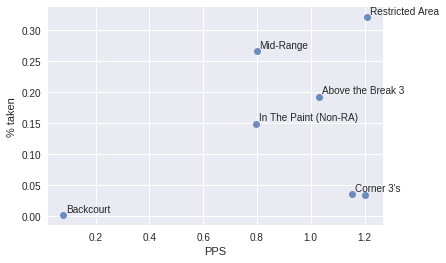

In [481]:
ax = sns.regplot(y='% taken', x='PPS', data=shot_type_df, fit_reg=False)
x = shot_type_df['PPS']+.01
y = shot_type_df['% taken']+.005
x = x[:-1]
y = y[:-1]
labels = shot_type_df.index.tolist()[:-1]
labels[3] = 'Corner 3\'s'
[ax.text(p[0], p[1], p[2]) for p in zip(x, y, labels)]
plt.show()

Looking at this graph, we notice that a shot in the restricted area is going to yield the most points per shot (PPS) since it has the highest field goal percentage. This is also the highest percentage shot taken in the NBA. This means players are effectively taking advantage of easy two point shots. Next, all the three pointer shots have the next highest PPS and are not taken as frequently as shots in the Restricted Area or Mid-Range shots. There is still some debate in the NBA on whether a three point shot is more effective than a two point jump shot. From our analysis, since a three point shot has a higher PPS than a long two or a mid range shot, I think the three pointer is much more effective for shooters who can shoot a high percentage from the three. This method of analysis could be used for each indivdual player to identify which type of shots they should shoot so they can become a more effective scorer.

In [485]:
players_shot_results_df = shots_df.groupby(['PLAYER_NAME', 'SHOT_ZONE_BASIC', 'SHOT_MADE_FLAG']).size().unstack(fill_value=0)
players_shot_results_df['total'] = players_shot_results_df[1] + players_shot_results_df[0]
players_shot_results_df['fg%'] = players_shot_results_df[1] / players_shot_results_df['total']

We can take a look at a specific players PPS and the percetange of shots they take. Let's take a look at Stephen Curry, arguably one of the best shooters in the NBA. First we are going to make a new data frame that contains all the players field goal percentages like we did previously. The only difference now is that we are going to add an additional groupby column, player name.

Below we are going to calculate the PPS and then plot it.

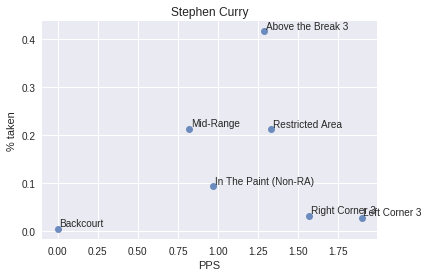

In [488]:
curry = players_shot_results_df.loc['Stephen Curry']
total = curry.total.sum()
curry['% taken'] = curry.total/total
curry['PPS'] = curry['fg%'] * 2
curry.loc['Right Corner 3', 'PPS'] = curry.loc['Right Corner 3']['fg%'] * 3
curry.loc['Left Corner 3', 'PPS'] = curry.loc['Left Corner 3']['fg%'] * 3
curry.loc['Above the Break 3', 'PPS'] = curry.loc['Above the Break 3']['fg%'] * 3
curry.loc['Backcourt', 'PPS'] = curry.loc['Backcourt']['fg%'] * 3
ax = sns.regplot(y='% taken', x='PPS', data=curry, fit_reg=False)
[ax.text(p[0], p[1], p[2]) for p in zip(curry['PPS']+.01, curry['% taken']+.005, curry.index.tolist())]
plt.title('Stephen Curry')
plt.show()

First of all, Stephen Curry takes almost 50% of his shots from behind the three point line. Since Steph is such a small player in relation to many other players in the NBA, this makes sense. His ability to shoot the three pointer at a high percentage allows him to have a higher PPS than a shot in the Restricted Area. We can see from the plot that the right and left corner 3's are the two highest PPS.

Now we can answer the question we asked in the beginning of the tutorial. Who are the best shooters in the NBA from the 2014-2015 season? The way we can do this is by calculating each players 2 point field goal percentage and 3 point percentage and then calculating their PPS like we did earlier. The only difference now is that we are going to combine 2 and 3 PPS by multiplying each PPS value by their respective frequency for each player, and then finally summing them up.

Final PPS = (2FG FREQ)(2FG% \* 2) + (3FG FREQ)(3FG% \* 3)

We are also going to set a minimum of at least 50 shots per both 2 and 3 pointers so we have a large enough sample size like we did earlier.

In [497]:
#best shooters
#limit by more than 50 shots per loc
shooters = shots_df[shots_df['SHOT_DISTANCE'] > 8]
two_df = shooters[shooters['SHOT_TYPE'] == '2PT Field Goal']
three_df = shooters[shooters['SHOT_TYPE'] == '3PT Field Goal']
two_df = two_df.groupby(['PLAYER_NAME', 'SHOT_MADE_FLAG']).size().unstack(fill_value=0)
three_df = three_df.groupby(['PLAYER_NAME', 'SHOT_MADE_FLAG']).size().unstack(fill_value=0)
two_df['2FGA'] = two_df[1] + two_df[0]
two_df = two_df.drop(0,axis=1)
two_df.columns = ['2FGM', '2FGA']
two_df['2FG%'] = two_df['2FGM'] / two_df['2FGA']
three_df['3FGA'] = three_df[1] + three_df[0]
three_df = three_df.drop(0,axis=1)
three_df.columns = ['3FGM', '3FGA']
two_df['3FGM'] = three_df['3FGM']
two_df['3FGA'] = three_df['3FGA']
two_df['3FG%'] = two_df['3FGM'] / two_df['3FGA']
two_df['2FG_FREQ'] = two_df['2FGA'] / (two_df['2FGA'] + two_df['3FGA'])
two_df['3FG_FREQ'] = two_df['3FGA'] / (two_df['2FGA'] + two_df['3FGA'])
two_df['PPS'] = (2 * two_df['2FG%'] * two_df['2FG_FREQ']) + (3 * two_df['3FG%'] * two_df['3FG_FREQ'])
two_df[(two_df['2FGA'] >= 50) & (two_df['3FGA'] >= 50)].sort('PPS', ascending=0).head(10)

,2FGM,2FGA,2FG%,3FGM,3FGA,3FG%,2FG_FREQ,3FG_FREQ,PPS
PLAYER_NAME,,,,,,,,,
Kyle Korver,50,115,0.434783,221.0,449.0,0.492205,0.203901,0.796099,1.352837
JJ Redick,176,353,0.498584,200.0,458.0,0.436681,0.435265,0.564735,1.173859
Stephen Curry,143,332,0.430723,286.0,646.0,0.442724,0.339468,0.660532,1.169734
Anthony Morrow,85,182,0.467033,141.0,325.0,0.433846,0.358974,0.641026,1.169625
Damjan Rudez,32,63,0.507937,69.0,170.0,0.405882,0.270386,0.729614,1.163090
Danny Green,43,121,0.355372,191.0,457.0,0.417943,0.209343,0.790657,1.140138
Jason Terry,31,64,0.484375,126.0,323.0,0.390093,0.165375,0.834625,1.136951
DeMarre Carroll,32,75,0.426667,120.0,304.0,0.394737,0.197889,0.802111,1.118734
Klay Thompson,174,418,0.416268,239.0,545.0,0.438532,0.434060,0.565940,1.105919


Looking at the results, we see that every player in the top 10 shoots over 50% of their shots from behind the 3 point line. That shows that players who can shoot a high percentage shot from behind the 3 point line will be very effective shooters. Kyle Korver is known to be one of the best shooters in the NBA, along with JJ Redick and Stephen Curry. Our analysis prooved those players to be the best as well.

### 3.3 Visualizing Shooting Data
In this section we are going to do some more advanced data visualization. In order to do that, we are going to continue to use the second data set because it contains the location of where a shot was taken.

One question we may want to answer is "Where do players shoot the best from?". Well, we can answer that. We can use a special plotting class called hexbin. This will basically group our data into bins and change the color of the bin based on how many points are in that specific bin. Please [click here](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.hexbin.html) to read more about hexbins. 

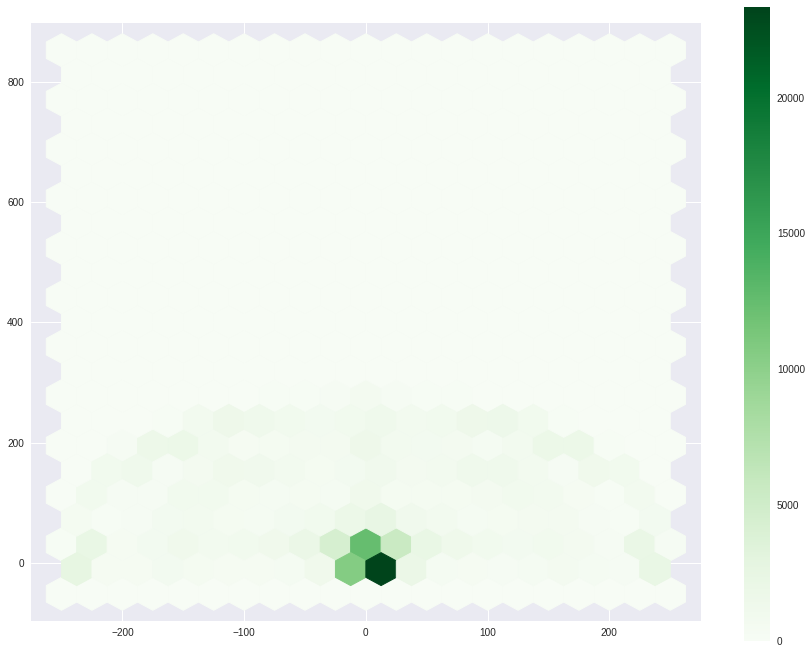

In [88]:
x = shots_df.LOC_X #x coordinates from our shots dataframe
y = shots_df.LOC_Y #y coordinates from our shots dataframe

fig=plt.figure(figsize=(12,11))
image = plt.hexbin(x,y,cmap=plt.cm.Greens,gridsize=20)
cbaxes = fig.add_axes([.95, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(image, cax = cbaxes)
plt.show()

This graph does not look like any sort of basketball court, nor does it look like data that we can interpret. One thing we can do is add the basketball court lines so the data points resemble acutal spots on the basketball court. To see how the basketball court lines are drawn you can read about it [here](http://savvastjortjoglou.com/nba-shot-sharts.html#Drawing-the-Court) (External link with code) or look at the code [here](#court).

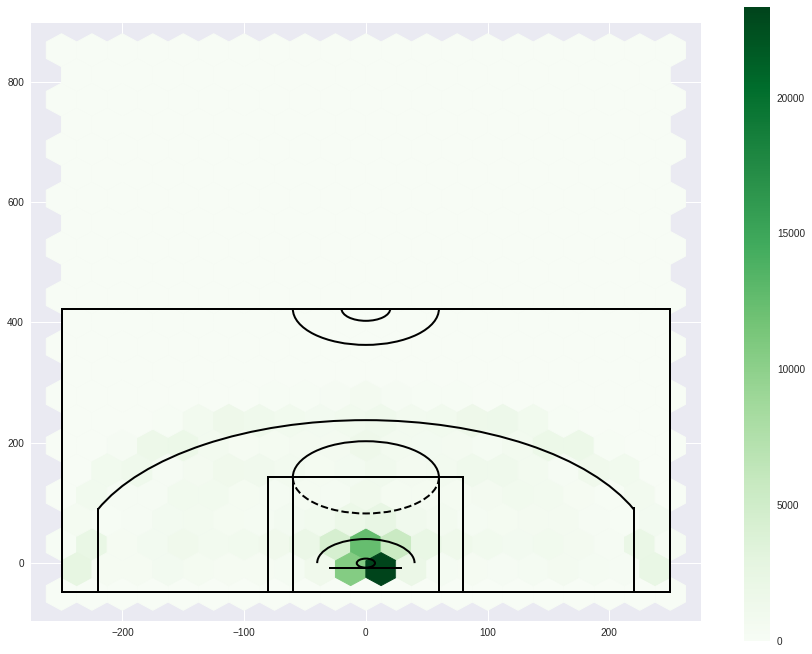

In [89]:
fig=plt.figure(figsize=(12,11))

draw_court(outer_lines=True) #add basketball court lines

image = plt.hexbin(x,y,cmap=plt.cm.Greens,gridsize=20)
cbaxes = fig.add_axes([.95, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(image, cax = cbaxes)
plt.show()

Now we have a white basketball court with some red and orange hexagons near the basket. If you have good vision you can also see some faint hexagons aroud the three point line. Obviously we need to do something to make this look better. To get rid of a lot of the yellow spaces, we can set the minimum count (mincnt) to 1. What this is doing is only plotting points where at least one shot was taken. We can also adjust the x and y bounds to make the plot fit to the dimensions of the basketball court.

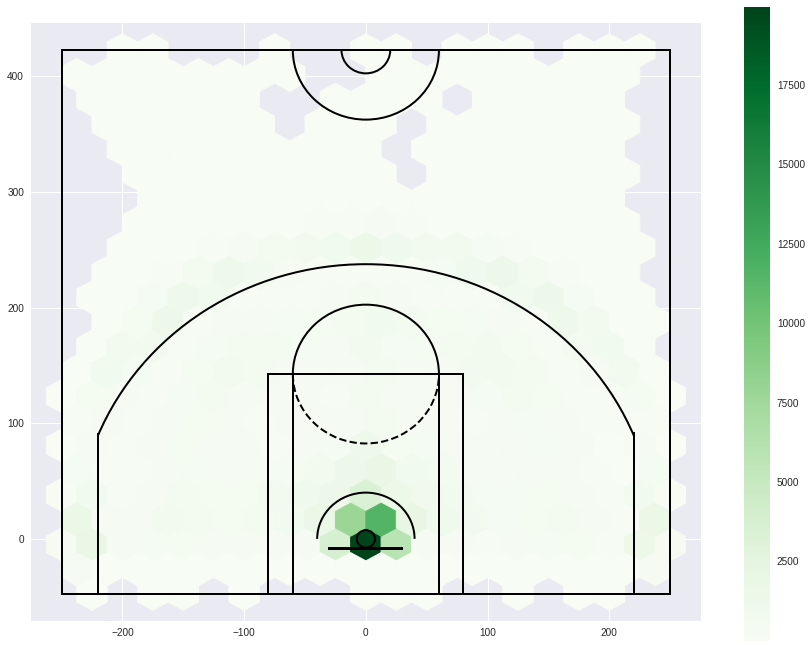

In [90]:
#bounds for x and y axes
xbnds = np.array([-250,250])
ybnds = np.array([-47.5, 422.5])

#parameter for hexbin
extent = [xbnds[0],xbnds[1],ybnds[0],ybnds[1]]

fig=plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
image = plt.hexbin(x,y,cmap=plt.cm.Greens,gridsize=20,extent=extent,mincnt=1)
cbaxes = fig.add_axes([.95, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(image, cax = cbaxes)
plt.show()

Now it is starting to look much better. We still need to get the data in a more interpretable manner though. Looking at the right hand side of the plot, there is a bar that indicates what each color on the plot means. In this case, since we are plotting the number of shots, it is indicating how many shots were taken at that location. Since there is such a big difference between shots taken at the basket and shots taken everywhere else, we need to either use some sort of data transformation or to plot something else about our data. We can use a transformation by plotting shooting percentage of each location. This is actually pretty easy to calculate since we can take advantage of the hexbin parameters _C_ and _reduce_\__C_\__function_. To read about these two parameters please see the [documentation](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.hexbin.html).

Since our newly loaded dataframe (shots_df) already contains a boolean field for the result of a shot, we can pass that into the _C_ paramter. Logically, a 1 means the shot went in and a 0 means the shot didn't go in. Then, we can use the numpy mean function to reduce the array of each bin and this will give us the percentage of shots made. One last thing we are going to change is the mincnt again. We are going to set it to 10 so we make sure that we are plotting shot locations that have a fair number of samples.

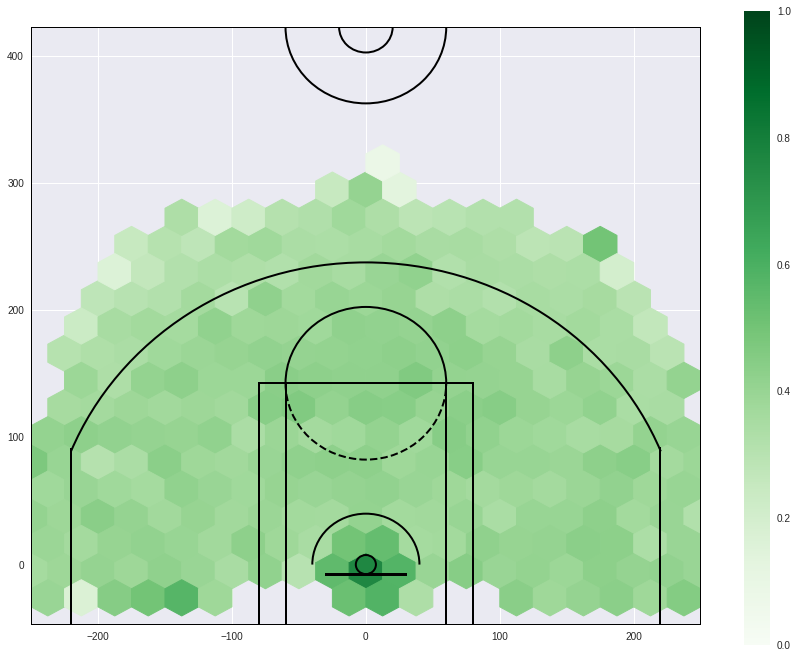

In [91]:
xbnds = np.array([-250,250])
ybnds = np.array([-47.5, 422.5])
extent = [xbnds[0],xbnds[1],ybnds[0],ybnds[1]]
fig=plt.figure(figsize=(12,11))
ax = fig.add_subplot(111)
draw_court(outer_lines=True)
x = shots_df.LOC_X
y = shots_df.LOC_Y
image = plt.hexbin(x,y,C=shots_df.SHOT_MADE_FLAG,reduce_C_function=np.mean,cmap=plt.cm.Greens,gridsize=20,extent=extent,mincnt=10)
ax.set_xlim(xbnds)
ax.set_ylim(ybnds)
cbaxes = fig.add_axes([.95, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(image, cax = cbaxes)
plt.clim(0,1)
plt.show()

And look at that! We have some cool looking data. Based on the indicator bar to the right, we can see that the darker colors indicate a higher percentage shot. The general trend of the data is that it gets lighter as you move further from the basket. There are some interesting points behind the three point line. For example, take the hexagon in the top right that is significantly darker than its neighbors. Why is this? There isn't really a clear answer we can come up with, but rather it is just an interesting statistic for now.

Did you ever wonder if NBA players shoot better or worse in the last two minutes of the game compared to the rest of it? Well we can use our EDA tools to help us see. Lets create two new dataframes. One will contain all the shots that occured during the last two minutes of game, and the other will contain the remaining shots that occured before the last two minutes of the game.

Note:<br>
eog = end of game<br>
rog = rest of game 

In [49]:
eog = shots_df[(shots_df['PERIOD'] == 4) & (shots_df['MINUTES_REMAINING'] < 2) & (shots_df['SHOT_DISTANCE'] > 18)]
rog = shots_df[(shots_df['PERIOD'] != 4) & (shots_df['MINUTES_REMAINING'] > 2) & (shots_df['SHOT_DISTANCE'] > 18)]

Then we can plot the percentages like we did earlier. This first plot is for the shots that occured in the last two minutes.

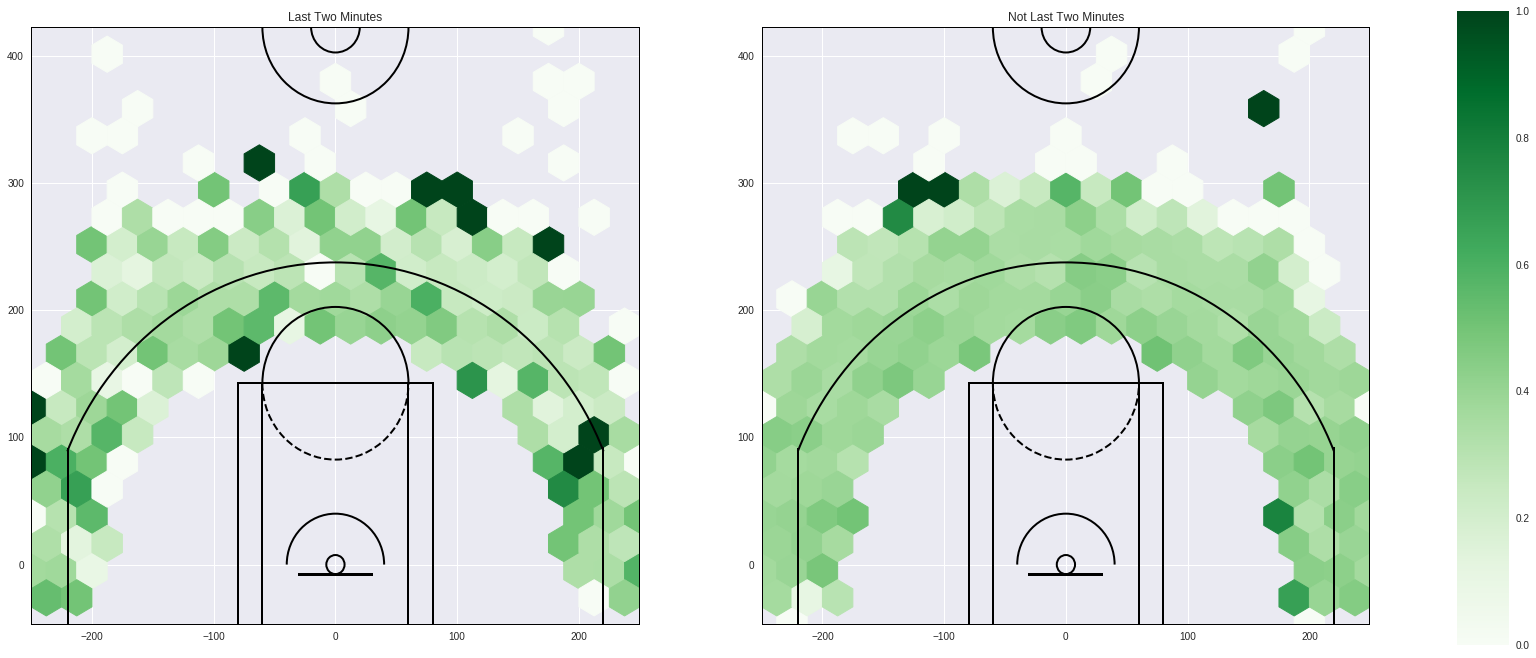

In [92]:
#set boundaires
xbnds = np.array([-250,250])
ybnds = np.array([-47.5, 422.5])
extent = [xbnds[0],xbnds[1],ybnds[0],ybnds[1]]

#creatue figure
fig=plt.figure(figsize=(24,11))

#build first plot with last two minutes
ax = fig.add_subplot(1,2,1)
draw_court(outer_lines=True)
x = eog.LOC_X
y = eog.LOC_Y
image = plt.hexbin(x,y,C=eog.SHOT_MADE_FLAG,cmap=plt.cm.Greens,gridsize=20,extent=extent)
ax.set_xlim(xbnds)
ax.set_ylim(ybnds)
ax.set_title('Last Two Minutes')

#build second plot with rest of game
ax = fig.add_subplot(1,2,2)
draw_court(outer_lines=True)
x = rog.LOC_X
y = rog.LOC_Y
image = plt.hexbin(x,y,C=rog.SHOT_MADE_FLAG,cmap=plt.cm.Greens,gridsize=20,extent=extent)
ax.set_xlim(xbnds)
ax.set_ylim(ybnds)
ax.set_title('Not Last Two Minutes')

#set colorbar on right
cbaxes = fig.add_axes([.95, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(image, cax = cbaxes)
plt.clim(0,1)
plt.show()

It is a little difficult to see if there is a difference but right plot (not the last two minutes) seems to be consistiently darker compared to the left plot. Instead of just estimating if there is a difference we can actually run a statistical test to check.

## 4. Hypothesis Testing
We can use statistics to test if the NBA shooting averages from the last two minutes of the game are different from the rest of the game, when players are shooting from more than 18 feet away. More specifically, hypothesis testing. If you are unfamiliar with hypothesis testing you can read more about it [here](https://www.investopedia.com/terms/h/hypothesistesting.asp). The specific kind of hypothesis test we want to run is going to be a t test which tests if two means are equal. [Here is more information about t tests](https://www.investopedia.com/terms/t/t-test.asp).

Our null hypothesis is going to be the shooting percentages are equal and our alternative hypothesis is going to be the shooting percentages are different.

In [87]:
#take our samples
eog_samp = eog.SHOT_MADE_FLAG.sample(frac=.333)
rog_samp = rog.SHOT_MADE_FLAG.sample(frac=.333)

print(eog_samp.mean())
print(rog_samp.mean())

#run the ttest
tval, pval = stats.ttest_ind(eog_samp,rog_samp)
print('The test statistic is: %f. The p-value is: %f' %(tval, pval))

0.296333002973
0.383104500381
The test statistic is: -5.442885. The p-value is: 0.000000


Since the p-value is less than 0.05 (our alpha value) we will reject the null hypothesis. That means the two shooting percentages _are_ different. It seems that NBA players shoot a significantly lower percentage shot during the last two minutes of the game when they are shooting from more than 18 feet away.

## 5. Conclusion
Players, coaches and analysts in the NBA our always looking for ways to improve players games and make their teams more effective. Analyzing shooting data can really help them. By looking at the points per shot of a player, it can be determined which type of shot is the most effective for that player and what shots they should shoot more of. For the shooting percentages analysis we did, that can be used for defensive purposes when coaches need come up with game plans to stop players like Stephen Curry. We also saw that from our testing, players shoot a lower percentage during the last two minutes of a game.

This dataset is very rich and there is a lot more interesting questions we can ask. For example, we could use machine learning to predict if shots will go in, we can look at specific players heatmaps, or even find out who the best defenders are. I encourage the reader to download the dataset and do their own experiments.

<a id='court'></a>

In [35]:
#this was used from http://savvastjortjoglou.com/nba-shot-sharts.html
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 139, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

## Appendix
This was adapted from http://www.gregreda.com/2015/02/15/web-scraping-finding-the-api/ and the data is from http://stats.nba.com. Please refer to the first link for more information about API's and scraping the data.

This section uses requests. To learn more about requests, please refer [here](http://docs.python-requests.org/en/master/).

The first thing I want to mention is that there was no way to get the shot logs of every player with one API call since one of the parameters of the call was the player id. This parameter was required so I had to get a list of player id's. Since the first dataframe I used already had this information, I just got a unique list of every player id from that dataframe. I then had to iterate through each player id and put it into the API call. I ran into some trouble when calling requests.get() on the stats.nba.com site. It was not returning any data for some reason. The way I fixed this was by adding headers. The headers make the request seem like it is coming from an actual web browser. The NBA site most likely requires these headers inorder for it to return any information.

Once I had a players shot logs, I converted it to a dataframe and then exported it to a CSV file. I just kept adding each players logs to one CSV file so all the data would be together.

In [ ]:
# Get list of unique player ids
player_ids = set(shots_df.player_id)

# Iterate through each id
for id in player_ids:
    shot_chart_url = ('http://stats.nba.com/stats/shotchartdetail?CFID=33&CFPARAMS=2014-15'
                      '&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment='
                      '&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0'
                      '&Outcome=&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerID=%s&PlayerPosition='
                      '&PlusMinus=N&Position=&Rank=N&RookieYear=&Season=2014-15&SeasonSegment='
                      '&SeasonType=Regular+Season&TeamID=0&VsConference=&VsDivision=&mode=Advanced'
                      '&showDetails=0&showShots=1&showZones=0' %id)
    
    # Get the webpage containing the data
    response = requests.get(shot_chart_url, headers={
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36"
    })
    
    # Grab the headers to be used as column headers for our DataFrame
    headers = response.json()['resultSets'][0]['headers']
    
    # Grab the shot chart data
    shots = response.json()['resultSets'][0]['rowSet']
    
    # Convert to dataframe
    shot_df = pd.DataFrame(shots, columns=headers)
    
    # Export to csv file
    shot_df.to_csv('shots.csv', mode='a', header=False)